In [1]:
import lifesim

In [2]:
from lifesim import Gui
#Gui()

In [3]:
bus = lifesim.Bus()

In [4]:
bus.data.options.set_scenario('baseline')

In [5]:
bus.data.options.set_manual(diameter=4.)

In [14]:
bus.data.catalog_from_ppop(input_path='/Users/iammhaiderkhan/Downloads/TestPlanetPopulation.txt',overwrite=True)

Processed line 45884 of 45884


In [15]:
bus.data.catalog_remove_distance(stype='A', mode='larger', dist=0.)  
bus.data.catalog_remove_distance(stype='M', mode='larger', dist=10.)  

In [16]:
instrument = lifesim.Instrument(name='inst')
bus.add_module(instrument)

In [17]:
transm = lifesim.TransmissionMap(name='transm')
bus.add_module(transm)

Noise addition to bus from different astrophysical sources

In [18]:
exozodi = lifesim.PhotonNoiseExozodi(name='exo')
bus.add_module(exozodi)
localzodi = lifesim.PhotonNoiseLocalzodi(name='local')
bus.add_module(localzodi)
star_leak = lifesim.PhotonNoiseStar(name='star')
bus.add_module(star_leak)

The LIFEsim instrument module is now connected to the noise modules.
Lastly the star module is also connected to the transmission map.

In [19]:
bus.connect(('inst', 'transm'))
bus.connect(('inst', 'exo'))
bus.connect(('inst', 'local'))
bus.connect(('inst', 'star'))

bus.connect(('star', 'transm'))

In [20]:
opt = lifesim.Optimizer(name='opt')
bus.add_module(opt)
ahgs = lifesim.AhgsModule(name='ahgs')
bus.add_module(ahgs)

bus.connect(('transm', 'opt'))
bus.connect(('inst', 'opt'))
bus.connect(('opt', 'ahgs'))

In [21]:
instrument.get_snr()
opt.ahgs()
#bus.data.options.optimization['habitable'] = True

100%|██████████| 535/535 [01:39<00:00,  5.39it/s]


Number of planets detected by stellar type:
A: 0.0  F: 1.7  G: 5.8  K: 35.4  M: 38.3  -  (2.0 / 2.0) yrs observed


In [23]:
df=bus.data.catalog
df.to_csv("lifesim_results", index=False)
plot=df[["radius_p","mass_p","habitable"]]

In [24]:
plot=plot.to_numpy()

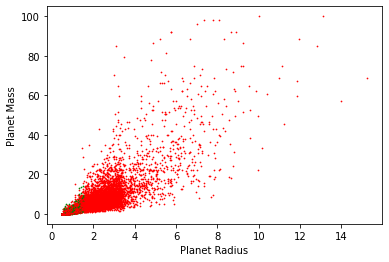

In [25]:
import matplotlib.pyplot as plt
for i in range(len(plot[0:,0])):
    if plot[i,1]<100:
        if plot[i,2]==True:
            plt.scatter(plot[i,0],plot[i,1],s=0.5,color='green')
        else:
            plt.scatter(plot[i,0],plot[i,1],s=0.5,color='red')
plt.xlabel("Planet Radius")
plt.ylabel("Planet Mass")
plt.show()

In [35]:
plt.savefig('Planets.pdf')  

<Figure size 640x480 with 0 Axes>

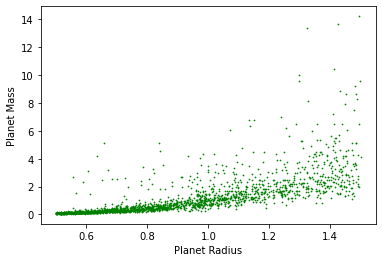

In [26]:
for i in range(len(plot[0:,0])):
    if plot[i,2]==True:
        plt.scatter(plot[i,0],plot[i,1],s=0.5,color='green')
plt.xlabel("Planet Radius")
plt.ylabel("Planet Mass")
plt.show()

In [37]:
plt.savefig('Planets.pdf')  

<Figure size 640x480 with 0 Axes>